In [1]:
import pandas as pd

# Load datasets
hs_tree = pd.read_csv('../data/Hs_Tree.csv')        # adjust filename
flat_table = pd.read_csv('../data/Flat_Table.csv')  # adjust filename

# Preview
print("hs_tree")
display(hs_tree.head())
print(hs_tree.info())

print("\nflat_table")
display(flat_table.head())
print(flat_table.info())


hs_tree


,HS2,HS4,HS6,description
0,1.0,NaN,NaN,"Horses; live, pure-bred breeding animals"
1,NaN,101.0,NaN,"Horses; live, pure-bred breeding animals"
2,NaN,NaN,10121.0,"Horses; live, pure-bred breeding animals"
3,NaN,NaN,10129.0,"Horses; live, other than pure-bred breeding an..."
4,NaN,NaN,10130.0,Asses; live


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HS2          97 non-null     float64
 1   HS4          1229 non-null   float64
 2   HS6          5613 non-null   float64
 3   description  6939 non-null   object 
dtypes: float64(3), object(1)
memory usage: 217.0+ KB
None

flat_table


,Section,HS6,Description
0,NaN,10121,"Horses; live, pure-bred breeding animals"
1,NaN,10129,"Horses; live, other than pure-bred breeding an..."
2,NaN,10130,Asses; live
3,NaN,10190,Mules and hinnies; live
4,NaN,10221,"Cattle; live, pure-bred breeding animals"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Section      0 non-null      float64
 1   HS6          5613 non-null   int64  
 2   Description  5613 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 131.7+ KB
None


In [4]:
hs_tree.isnull().sum()

HS2            6842
HS4            5710
HS6            1326
description       0
dtype: int64

In [ ]:
hs_tree.duplicated().sum()

0

In [5]:
flat_table.isnull().sum()

Section        5613
HS6               0
Description       0
dtype: int64

In [6]:
flat_table.duplicated().sum()

0

In [7]:
unique_hs6_flat = flat_table['HS6'].nunique()
print(f"Unique hs6 codes in flat_table: {unique_hs6_flat}")

Unique hs6 codes in flat_table: 5613


In [8]:
unique_hs6_tree = hs_tree['HS6'].nunique()
print(f"Unique hs6 codes in hs_tree: {unique_hs6_tree}")

Unique hs6 codes in hs_tree: 5613


In [9]:
import plotly.express as px



In [10]:
hs_tree_clean = hs_tree.dropna(subset=['HS2', 'HS4', 'HS6'])


In [11]:
hs_tree_clean['HS2'] = hs_tree_clean['HS2'].astype(str)
hs_tree_clean['HS4'] = hs_tree_clean['HS4'].astype(str)
hs_tree_clean['HS6'] = hs_tree_clean['HS6'].astype(str)

In [13]:
hs_tree_clean['count'] = 1


In [17]:
# Clean HS6
hs_tree['HS6'] = hs_tree['HS6'].astype(str).str.strip().str.zfill(6)

In [18]:
hs_tree['HS2'] = hs_tree['HS6'].str[:2]
hs_tree['HS4'] = hs_tree['HS6'].str[:4]

In [20]:
hs_tree[['HS2', 'HS4', 'HS6', 'description']].head(10)

,HS2,HS4,HS6,description
0,00,000n,000nan,"Horses; live, pure-bred breeding animals"
1,00,000n,000nan,"Horses; live, pure-bred breeding animals"
2,10,1012,10121.0,"Horses; live, pure-bred breeding animals"
3,10,1012,10129.0,"Horses; live, other than pure-bred breeding an..."
4,10,1013,10130.0,Asses; live
5,10,1019,10190.0,Mules and hinnies; live
6,00,000n,000nan,"Cattle; live, pure-bred breeding animals"
7,10,1022,10221.0,"Cattle; live, pure-bred breeding animals"
8,10,1022,10229.0,"Cattle; live, other than pure-bred breeding an..."
9,10,1023,10231.0,"Buffalo; live, pure-bred breeding animals"


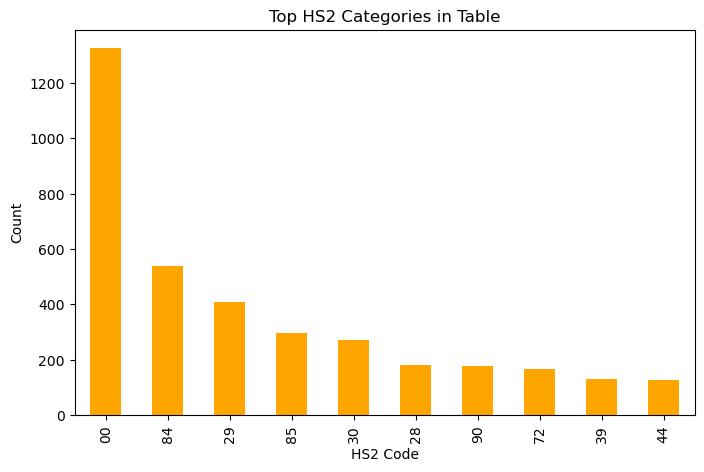

In [25]:
import matplotlib.pyplot as plt

hs_tree['HS2'].value_counts().head(10).plot(kind='bar', figsize=(8,5), color='orange')
plt.title("Top HS2 Categories in Table")
plt.xlabel("HS2 Code")
plt.ylabel("Count")
plt.show()
